# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Reasons Behind Anchor Protocol Heavy Downtrend.  Anchor Protocol is a platform that provides crypto investors and fintech establishments with high returns on investment. Its native token ANC is one of the most in the present bearish market. At the time of writing, it is trading at $0.2863, with a 24 hours decrease in price by 36.43%. In the past 7 days, the price of Anchor Protocol has fallen by 84.7% according to CoinGecko. Some of the reasons for the present decline in the price of ANC are: The present market downtrend The fall in the price of TerraUSD The delay in transactions in the Avalanche network The present market downtrend In most market conditions, the price of altcoins moves in the direction of the trend of Bitcoin (BTC). With the increase in the volatility of the market, the price of Anchor Protocol (ANC) joined most cryptocurrencies to fall as the present cycle last. The continuous price decline makes retail and short-term investors sell more, so as to safeguard the remaining balance in their assets. This selling pressure makes the market to fall further since sellers are in charge. The fall in the price of TerraUSD TerraUSD (UST) is one of the major stablecoins used in the Anchor Protocol ecosystem for its lending services. With the implosion that happened on the Terra network, which saw both its native token LUNA and its Stablecoin TerraUSD (UST) to decline heavily, the price of Anchor Protocol’s native token ANC was also affected. Delay in transactions compl... ... [| Skaityti daugiau](https://www.cryptoknowmics.com/news/reasons-behind-anchor-protocol-heavy-downtrend/?utm_source=rss&utm_medium=rss&utm_campaign=reasons-behind-anchor-protocol-heavy-downtrend) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Why COVID is a key suspect in severe hepatitis cases in kids worldwide | CBC News.  Unexplained hepatitis cases among children continue to emerge in Canada and around the world, and while health officials desperately search for a cause of the mysterious illness, researchers are pointing to a possible link to COVID-19. ... [| Skaityti daugiau](http://www.cbc.ca/news/health/severe-hepatitis-children-covid-suspect-1.6451267) 

### Kainų kaita pandemijos metu

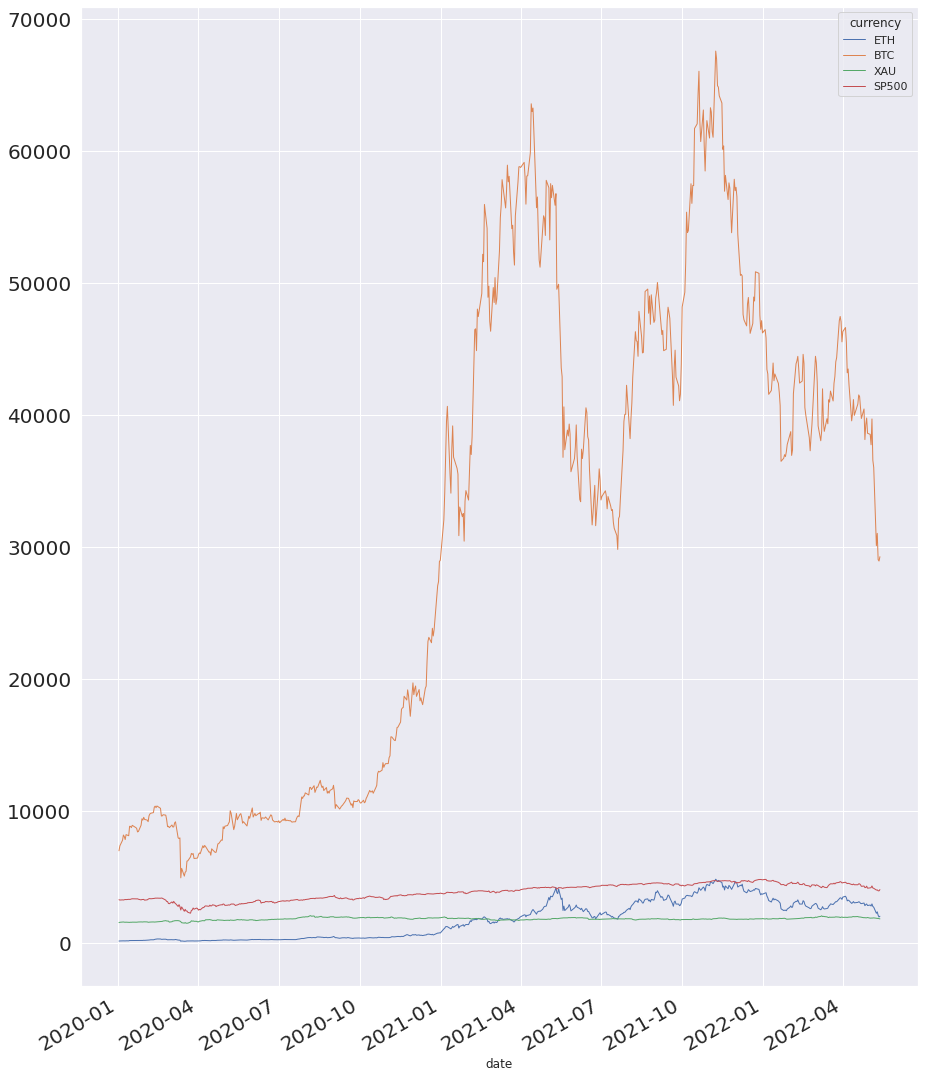

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903246,0.247933,0.924364
BTC,0.903246,1.000000,0.197039,0.872957
XAU,0.247933,0.197039,1.000000,0.376792
SP500,0.924364,0.872957,0.376792,1.000000


In [8]:
#hide ### Koreliacijos matrica.

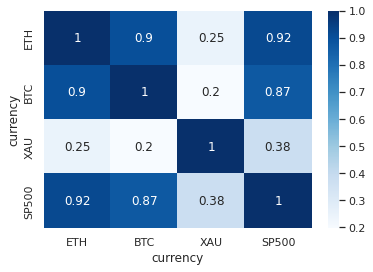

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')